In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import norm
import math

# file_path = '/mnt1/hyj/Acc_Test/tta_new/tta/data/nde_test_2025-6-12/nde_160_test.npy'
nade_file_path = '/mnt1/hyj/Acc_Test/tta_new/tta/data/nade_test_2025-6-12/nade_160_test.npy'
nade_data = np.load(nade_file_path)
nde_file_path = '/mnt1/hyj/Acc_Test/tta_new/tta/data/nde_test_2025-6-12/nde_160_test.npy'
nde_data = np.load(nde_file_path)

In [22]:
nade_file_path_list = os.listdir('/mnt1/hyj/Acc_Test/tta_new/tta/data/nade_test_2025-6-24/')
nade_data_list = []
nde_data_list = []
for nade_file in nade_file_path_list:
    nade_data_list.append(np.load(os.path.join('/mnt1/hyj/Acc_Test/tta_new/tta/data/nade_test_2025-6-24/', nade_file)))

nade_data = np.concatenate(nade_data_list, axis=0)

In [23]:

alpha=0.05
z=norm.isf(q=alpha)
def calculate_val(the_list):
    Mean=[]
    Relative_half_width=[]
    Var=[]
    acc=[]
    var_old=0
    mean_old=0
    for i in range(len(the_list)):
        if math.isnan(the_list[i]) or math.isinf(the_list[i]):
            the_list[i]=0.0
        n=i+1
        mean_new=mean_old+(the_list[i]-mean_old)/n
        Mean.append(mean_new)
        var_new=(n-1)*var_old/n+(n-1)*(the_list[i]-mean_old)**2/(n*n)
        Var.append(1.96*(np.sqrt(var_new/n)))
        Relative_half_width.append(z*(np.sqrt(var_new/n)/(mean_new+1e-30)))
        var_old=var_new
        mean_old=mean_new
    return Mean,Relative_half_width,Var


data shape: (1999868,)
data shape: (369000,)
nde_Mean: 2.350155110237276e-05
nade_Mean: 0.0001250936684298284
nde_RHF: 0.2399237409708408 6.718906007652571e-06
nade_RHF: 0.7357606706451327 0.00010967324979185355


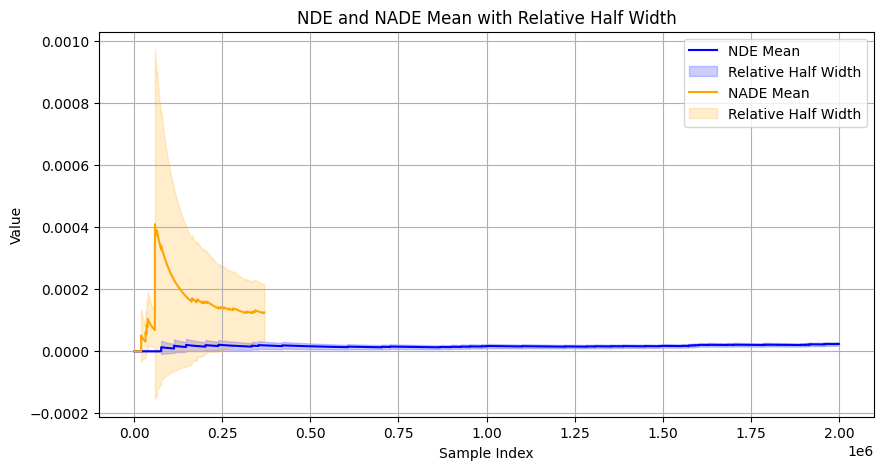

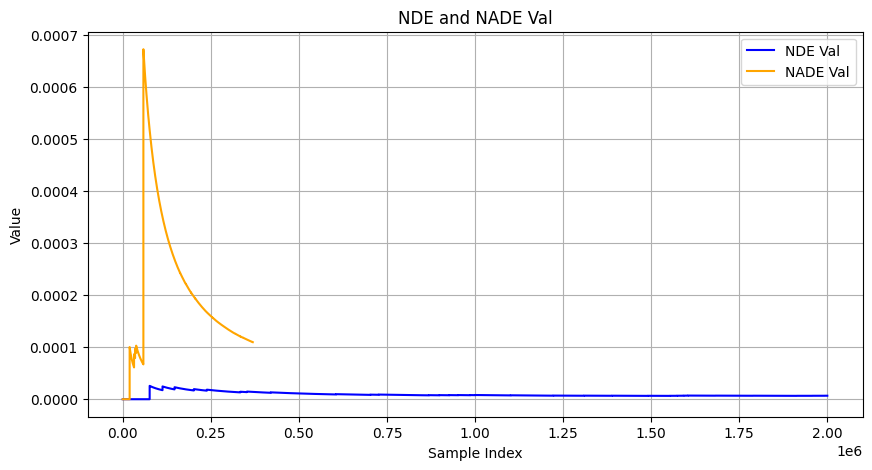

In [24]:
print("data shape:", nde_data.shape)
print("data shape:", nade_data.shape)
# nde_data = nde_data[:358000]
# nade_data = nade_data[:358000]
nde_Mean, nde_RHF, nde_Val = calculate_val(nde_data)
nade_Mean, nade_RHF, nade_Val = calculate_val(nade_data)
nde_RHF = np.array(nde_RHF)
nade_RHF = np.array(nade_RHF)
print('nde_Mean:', nde_Mean[-1])
print('nade_Mean:', nade_Mean[-1])
print('nde_RHF:', nde_RHF[-1], nde_Val[-1])
print('nade_RHF:', nade_RHF[-1], nade_Val[-1])
plt.figure(figsize=(10, 5))
plt.plot(nde_Mean, label='NDE Mean', color='blue')
# plt.fill_between(range(len(nde_Mean)), np.array(nde_Mean) - np.array(nde_RHF), 
#                  np.array(nde_Mean) + np.array(nde_RHF), color='blue', alpha=0.2, label='NDE RHF')
plt.fill_between(range(len(nde_Mean)), (1-nde_RHF)*np.array(nde_Mean), (1+nde_RHF)*np.array(nde_Mean), color='blue', alpha=0.2, label='Relative Half Width')

plt.plot(nade_Mean, label='NADE Mean', color='orange')
# plt.fill_between(range(len(nade_Mean)), np.array(nade_Mean) - np.array(nade_RHF), 
#                  np.array(nade_Mean) + np.array(nade_RHF), color='orange', alpha=0.2, label='NADE RHF')
plt.fill_between(range(len(nade_Mean)), (1-nade_RHF)*np.array(nade_Mean), (1+nade_RHF)*np.array(nade_Mean), color='orange', alpha=0.2, label='Relative Half Width')

plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('NDE and NADE Mean with Relative Half Width')
plt.legend()
plt.grid()
# plt.savefig('nde_nade_mean_rhf.png')
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(nde_Val, label='NDE Val', color='blue')
plt.plot(nade_Val, label='NADE Val', color='orange')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('NDE and NADE Val')
plt.legend()
plt.grid()
# plt.savefig('nde_nade_val.png')
plt.show()



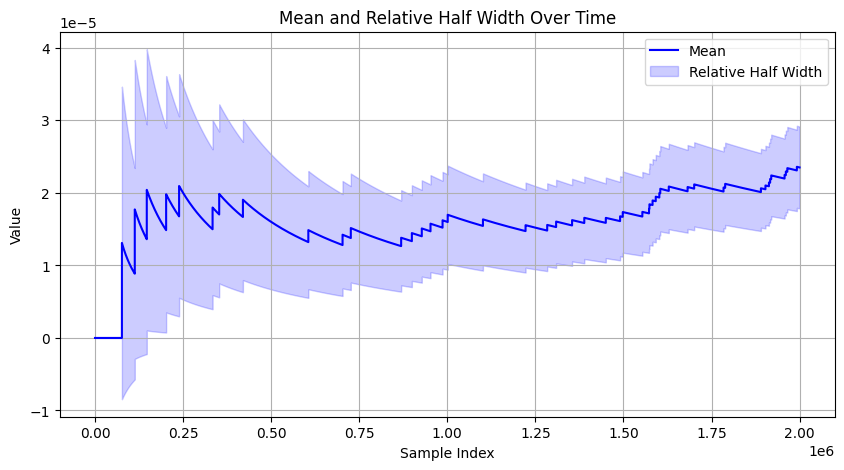

In [25]:
RHF = np.array(nde_RHF)
# plotting
plt.figure(figsize=(10, 5))
plt.plot(nde_Mean, label='Mean', color='blue')
plt.fill_between(range(len(nde_Mean)), (1-RHF)*np.array(nde_Mean), (1+RHF)*np.array(nde_Mean), color='blue', alpha=0.2, label='Relative Half Width')
plt.title('Mean and Relative Half Width Over Time')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid()
# plt.savefig('mean_relative_half_width_plot.png')
plt.show()